<a href="https://colab.research.google.com/github/tlkt/fast_lesson_work/blob/master/lession_4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai.collab import *
from fastai.tabular import *

In [0]:
user,item,title='userId','movieId','title'

In [12]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/root/.fastai/data/movie_lens_sample')

In [13]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [0]:
data = CollabDataBunch.from_df(ratings,seed=42)
y_rang = [0,5,5]

In [16]:
learn = collab_learner(data,n_factors=50,y_range=y_rang)
learn.fit_one_cycle(3,5e-3)

epoch,train_loss,valid_loss,time
0,2.041571,1.080073,00:00
1,0.933458,0.679021,00:00
2,0.684714,0.670983,00:00


In [21]:
! wget http://files.grouplens.org/datasets/movielens/ml-100k.zip

--2020-01-15 23:02:07--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  29.3MB/s    in 0.2s    

2020-01-15 23:02:07 (29.3 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]



In [0]:
! mv ml-100k '/root/.fastai/data'

In [0]:
path=Config.data_path()/'ml-100k'

In [0]:
ratings = pd.read_csv(path/'u.data',delimiter='\t',header=None,names=[user,item,'rating','timestamp'])

In [31]:
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [32]:
movies = pd.read_csv(path/'u.item',delimiter='|',encoding='latin-1',header=None,names=[item,'title','date','N','url',*[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [33]:
len(ratings)

100000

In [34]:
rating_movie = ratings.merge(movies[[item,title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [35]:
data = CollabDataBunch.from_df(rating_movie,seed=42,valid_pct=0.1,item_name=title)
data.show_batch()

userId,title,target
539,Groundhog Day (1993),5.0
268,"Phantom, The (1996)",1.0
521,So I Married an Axe Murderer (1993),2.0
214,Forrest Gump (1994),2.0
727,Wes Craven's New Nightmare (1994),2.0


In [0]:
y_range=[0,5.5]
learn = collab_learner(data,n_factors=40,y_range=y_rang,wd=1e-1)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


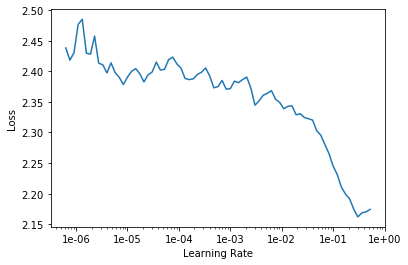

In [37]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [38]:
learn.fit_one_cycle(5,5e-3)

epoch,train_loss,valid_loss,time
0,0.967709,0.960572,00:09
1,0.877084,0.891843,00:09
2,0.798651,0.849343,00:09
3,0.710402,0.820386,00:09
4,0.653508,0.818433,00:09


In [0]:
learn.save('dotprod')

In [40]:
learn.load('dotprod')

CollabLearner(data=TabularDataBunch;

Train: LabelList (90000 items)
x: CollabList
userId 196; title Kolya (1996); ,userId 63; title Kolya (1996); ,userId 226; title Kolya (1996); ,userId 154; title Kolya (1996); ,userId 306; title Kolya (1996); 
y: FloatList
3.0,3.0,5.0,3.0,5.0
Path: .;

Valid: LabelList (10000 items)
x: CollabList
userId 498; title Casino (1995); ,userId 642; title Pocahontas (1995); ,userId 58; title 2001: A Space Odyssey (1968); ,userId 495; title Cat People (1982); ,userId 618; title Philadelphia (1993); 
y: FloatList
3.0,5.0,4.0,3.0,3.0
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=FlattenedLoss of MSELoss(), metrics=[], true_wd=True, bn_wd=True, wd=0.1, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<clas

In [41]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [42]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

In [43]:
movie_bias = learn.bias(top_movies,is_item=True)
movie_bias.shape

torch.Size([1000])

In [0]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b,i,mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [0]:
item0 = lambda o:o[0]

In [47]:
sorted(movie_ratings,key=item0)[:15]

[(tensor(-0.3317),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.2536),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2121), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2105), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2066), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2059), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.1918), 'Thinner (1996)', 2.4489795918367347),
 (tensor(-0.1911), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.1705), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.1703), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.1662), 'Home Alone 3 (1997)', 1.894736842105263),
 (tensor(-0.1660),
  'Tales from the Crypt Presents: Bordello of Blood (1996)',
  2.6363636363636362),
 (tensor(-0.1659), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.1617), 'Beautician and the Beast, The (1997)', 

In [48]:
sorted(movie_ratings,key=lambda o:o[0],reverse=True)[:15]

[(tensor(0.6198), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.6124), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5784), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5773), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5693), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5271), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.5216), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5127), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5099), 'Apt Pupil (1998)', 4.1),
 (tensor(0.5034), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4820), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4773), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.4772), "One Flew Over the Cuckoo's Nest (1975)", 4.291666666666667),
 (tensor(0.4697), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4653), 'Contact (1997)', 3.8035363457760316)]

In [0]:
movie_w = learn.weight(top_movies,is_item=True)

In [50]:
movie_w.shape

torch.Size([1000, 40])

In [51]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [0]:
fac0,fac1,fac2 = movie_pca.t()
movie_camp = [(f,i) for f,i in zip(fac0,top_movies)]

In [54]:
sorted(movie_camp,key=itemgetter(0),reverse=True)[:10]

[(tensor(1.3725), "McHale's Navy (1997)"),
 (tensor(1.3212), 'Children of the Corn: The Gathering (1996)'),
 (tensor(1.2841), 'Home Alone 3 (1997)'),
 (tensor(1.2428), 'Jungle2Jungle (1997)'),
 (tensor(1.1749), 'D3: The Mighty Ducks (1996)'),
 (tensor(1.1705), 'Leave It to Beaver (1997)'),
 (tensor(1.1593), 'Bio-Dome (1996)'),
 (tensor(1.1377), 'Congo (1995)'),
 (tensor(1.1274), 'Free Willy 3: The Rescue (1997)'),
 (tensor(1.1011), 'Mortal Kombat: Annihilation (1997)')]

In [55]:
sorted(movie_camp,key=itemgetter(0))[:10]

[(tensor(-1.4961), 'Close Shave, A (1995)'),
 (tensor(-1.4613), 'Wrong Trousers, The (1993)'),
 (tensor(-1.4556), 'Casablanca (1942)'),
 (tensor(-1.2574), 'Godfather, The (1972)'),
 (tensor(-1.2426), 'Usual Suspects, The (1995)'),
 (tensor(-1.2320), 'Chinatown (1974)'),
 (tensor(-1.2061), 'Rear Window (1954)'),
 (tensor(-1.2025), 'North by Northwest (1959)'),
 (tensor(-1.1896), "Schindler's List (1993)"),
 (tensor(-1.1894), 'Citizen Kane (1941)')]

In [0]:
movie_comp = [(f,i) for f,i in zip(fac1,top_movies)]

In [57]:
sorted(movie_comp,key=itemgetter(0),reverse=True)[:10]

[(tensor(1.3421), 'Raiders of the Lost Ark (1981)'),
 (tensor(1.3048), 'Braveheart (1995)'),
 (tensor(1.2275), 'Titanic (1997)'),
 (tensor(1.0924), 'Star Wars (1977)'),
 (tensor(0.9867), "Schindler's List (1993)"),
 (tensor(0.9679), "It's a Wonderful Life (1946)"),
 (tensor(0.9670), 'Independence Day (ID4) (1996)'),
 (tensor(0.9657), 'Return of the Jedi (1983)'),
 (tensor(0.9655), 'Forrest Gump (1994)'),
 (tensor(0.9554), 'Indiana Jones and the Last Crusade (1989)')]

In [58]:
sorted(movie_comp,key=itemgetter(0))[:10]

[(tensor(-0.9195), 'Trainspotting (1996)'),
 (tensor(-0.9098), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(-0.8790), 'Clockwork Orange, A (1971)'),
 (tensor(-0.8705), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(-0.8072), 'Crumb (1994)'),
 (tensor(-0.7763), 'Serial Mom (1994)'),
 (tensor(-0.7671), 'Stuart Saves His Family (1995)'),
 (tensor(-0.7524), 'Keys to Tulsa (1997)'),
 (tensor(-0.7390), 'Brazil (1985)'),
 (tensor(-0.7378), 'Sweet Hereafter, The (1997)')]

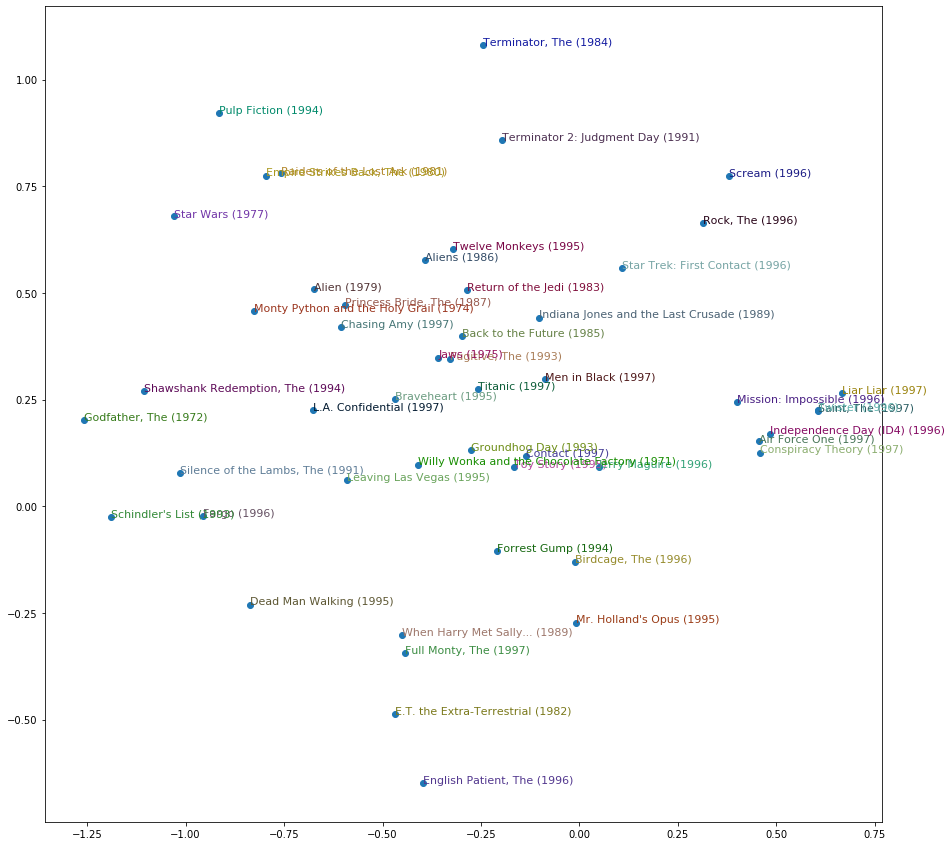

In [59]:
idxs = np.random.choice(len(top_movies),50,replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X,Y)
for i,x,y in zip(top_movies[idxs],X,Y):
  plt.text(x,y,i,color=np.random.rand(3)*0.7,fontsize=11)
plt.show()